In [1]:
import pandas as pd
import os

In [ ]:
path = os.getcwd() +'/data'
tax_data = pd.read_csv(path+'/PC_normalized_PC92_HC384_130 genus_ML.csv')
path_data = pd.read_csv(path+'/PC Pathway.csv')
ortho_data = pd.read_csv(path+'/PC Orthology.csv')

In [23]:
ortho_data

,study_no,group_1,group_2,K00001,K00002,K00003,K00004,K00005,K00006,K00007,...,K09499,K10172,K11673,K13418,K15102,K17513,K19950,K20853,K22158,K22387
0,H1700052,Cancer,1,0.000338,0.000216,0.000511,0.000095,0.000366,0.000000e+00,5.000000e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H1700067,Cancer,1,0.000196,0.000128,0.000340,0.000058,0.000179,7.900000e-06,4.000000e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,H1700072,Cancer,1,0.000236,0.000230,0.000365,0.000025,0.000274,6.000000e-07,3.000000e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H1700070,Cancer,1,0.000193,0.000099,0.000401,0.000131,0.000142,1.230000e-05,3.500000e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,H1700068,Cancer,1,0.000103,0.000038,0.000413,0.000266,0.000049,9.500000e-06,1.060000e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,H1900931,Control,0,0.000076,0.000061,0.000325,0.000132,0.000069,1.219000e-05,1.595000e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
472,H1900932,Control,0,0.000051,0.000035,0.000415,0.000260,0.000040,1.408000e-05,1.287000e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
473,H1900933,Control,0,0.000126,0.000039,0.000319,0.000127,0.000083,1.283000e-05,6.630000e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474,H1900936,Control,0,0.000364,0.000243,0.000505,0.000105,0.000310,5.610000e-06,1.128000e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
use_tax_data = tax_data[['study_no','group_1','Desulfovibrio', 'Fretibacterium', 'Lactobacillus', 'Leuconostoc', 
                      'Olsenella', 'Parvimonas', 'Ralstonia','Pseudomonas', 'Simonsiella']]
use_path_data = path_data[['study_no','group_2','ko00220', 'ko00601']]
use_ortho_data = ortho_data[['study_no','group_2','K03371', 'K01476','K07966']]

In [29]:
use_ortho_data

,study_no,group_2,K03371,K01476,K07966
0,H1700052,1,7.500000e-06,0.000008,0.000000e+00
1,H1700067,1,2.900000e-06,0.000005,3.500000e-06
2,H1700072,1,7.300000e-06,0.000005,9.000000e-07
3,H1700070,1,8.000000e-07,0.000005,1.800000e-06
4,H1700068,1,2.130000e-05,0.000013,2.900000e-06
...,...,...,...,...,...
471,H1900931,0,2.720000e-06,0.000016,3.470000e-06
472,H1900932,0,2.480000e-06,0.000013,5.780000e-06
473,H1900933,0,4.130000e-06,0.000008,3.710000e-06
474,H1900936,0,1.600000e-07,0.000012,5.500000e-07


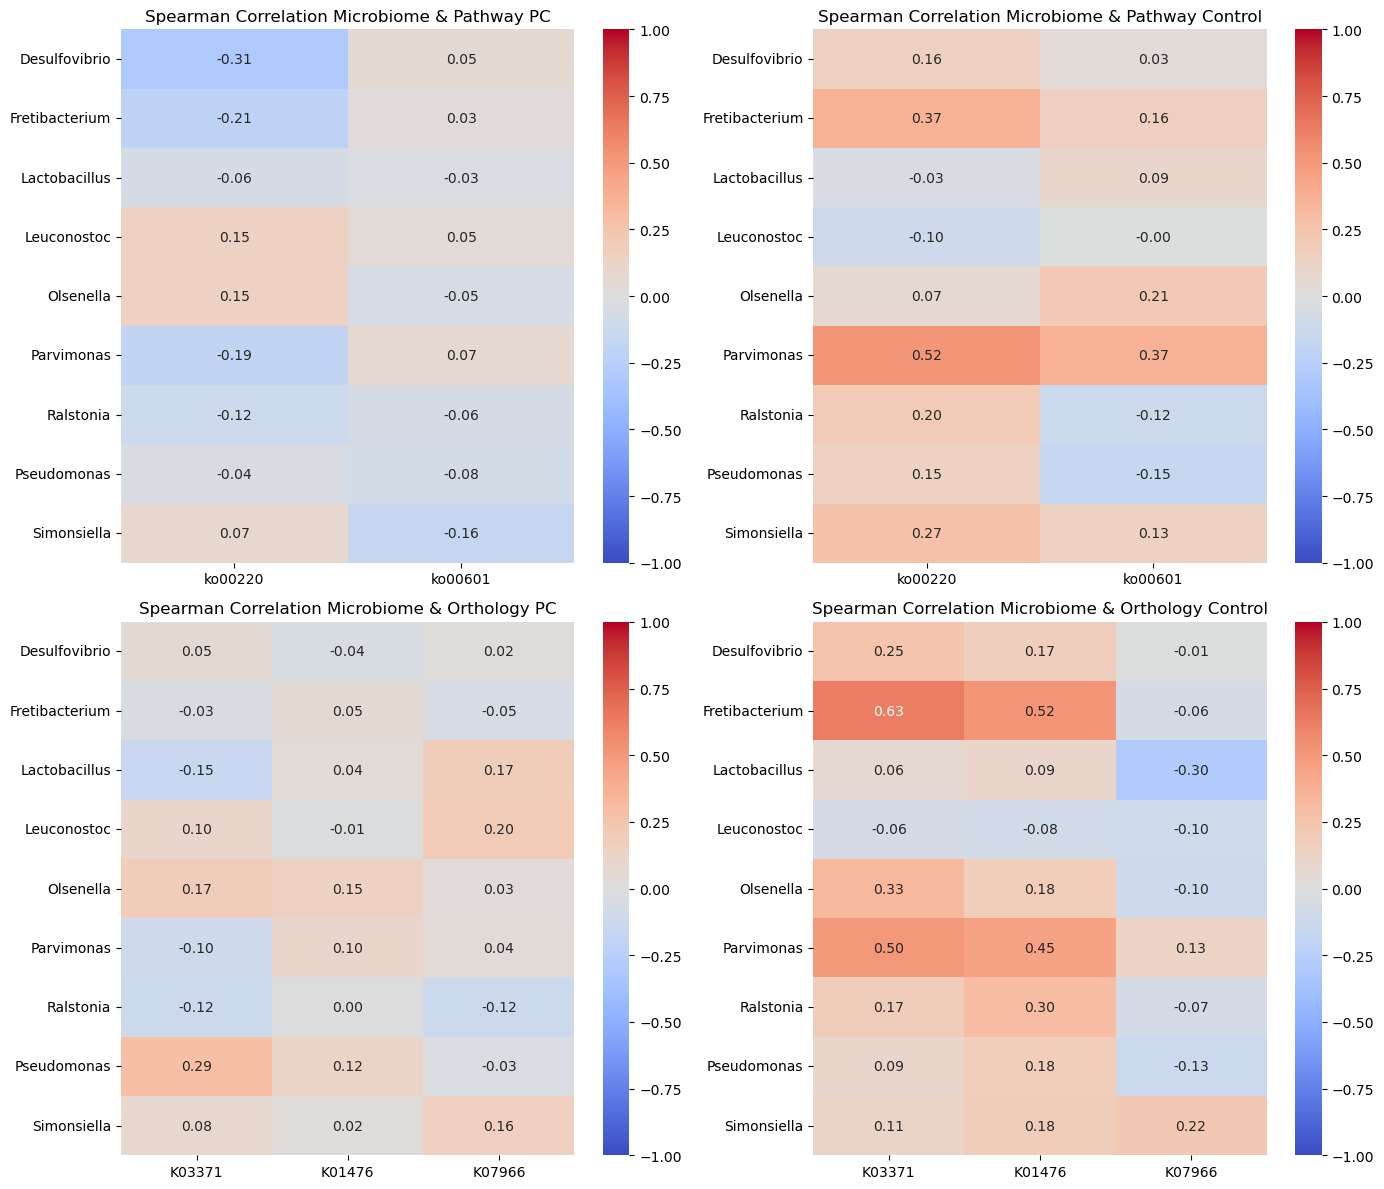

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate pairwise correlations between two DataFrames
def calculate_pairwise_spearman(df1, df2):
    correlation_matrix = pd.DataFrame(index=df1.columns, columns=df2.columns)
    for col1 in df1.columns:
        for col2 in df2.columns:
            correlation_matrix.loc[col1, col2] = df1[col1].corr(df2[col2], method='spearman')
    return correlation_matrix.astype(float)

# Filter data for each group
pc_tax_data = use_tax_data[use_tax_data['group_1'] == 1].drop(['study_no', 'group_1'], axis=1)
control_tax_data = use_tax_data[use_tax_data['group_1'] == 0].drop(['study_no', 'group_1'], axis=1)

pc_path_data = use_path_data[use_path_data['group_2'] == 1].drop(['study_no', 'group_2'], axis=1)
control_path_data = use_path_data[use_path_data['group_2'] == 0].drop(['study_no', 'group_2'], axis=1)

pc_ortho_data = use_ortho_data[use_ortho_data['group_2'] == 1].drop(['study_no', 'group_2'], axis=1)
control_ortho_data = use_ortho_data[use_ortho_data['group_2'] == 0].drop(['study_no', 'group_2'], axis=1)

# Calculate pairwise Spearman correlations for each group and pairing
# 1. PC Tax vs Path
pc_tax_path_corr = calculate_pairwise_spearman(pc_tax_data, pc_path_data)

# 2. Control Tax vs Path
control_tax_path_corr = calculate_pairwise_spearman(control_tax_data, control_path_data)

# 3. PC Tax vs Ortho
pc_tax_ortho_corr = calculate_pairwise_spearman(pc_tax_data, pc_ortho_data)

# 4. Control Tax vs Ortho
control_tax_ortho_corr = calculate_pairwise_spearman(control_tax_data, control_ortho_data)

# Plot heatmaps
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot each heatmap
sns.heatmap(pc_tax_path_corr, ax=axes[0, 0], cmap="coolwarm", annot=True, fmt=".2f", cbar=True, vmin=-1, vmax=1)
axes[0, 0].set_title("Spearman Correlation Microbiome & Pathway PC")

sns.heatmap(control_tax_path_corr, ax=axes[0, 1], cmap="coolwarm", annot=True, fmt=".2f", cbar=True, vmin=-1, vmax=1)
axes[0, 1].set_title("Spearman Correlation Microbiome & Pathway Control")

sns.heatmap(pc_tax_ortho_corr, ax=axes[1, 0], cmap="coolwarm", annot=True, fmt=".2f", cbar=True, vmin=-1, vmax=1)
axes[1, 0].set_title("Spearman Correlation Microbiome & Orthology PC")

sns.heatmap(control_tax_ortho_corr, ax=axes[1, 1], cmap="coolwarm", annot=True, fmt=".2f", cbar=True, vmin=-1, vmax=1)
axes[1, 1].set_title("Spearman Correlation Microbiome & Orthology Control")

# Layout and show plot
plt.tight_layout()
plt.show()
